# **Dataset Information**

contents: 3 classes of 50 instances each, each instance is a type of plant. One class is linearly separable from another 2; the other 2 are NOT linearly separable from each other.

Info:
1. Sepal lenght in CM
2. Sepal widht in CM
3. Petal lenght in CM
4. Petal widht in CM
5. CLass:- Iris Selosa, Iris Versicolour, Iris Virginica

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete the id column

df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# display stats of df

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# info of df
df.info()
# no null values present!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# display no. of samples on each class
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Preprocessing**

In [7]:
# check null values

df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Exploratory Data Analysis**

<Axes: >

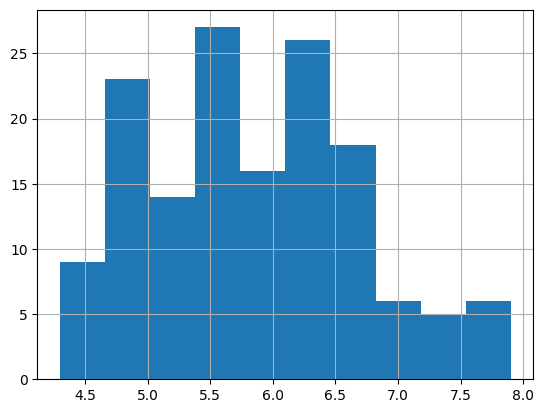

In [8]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

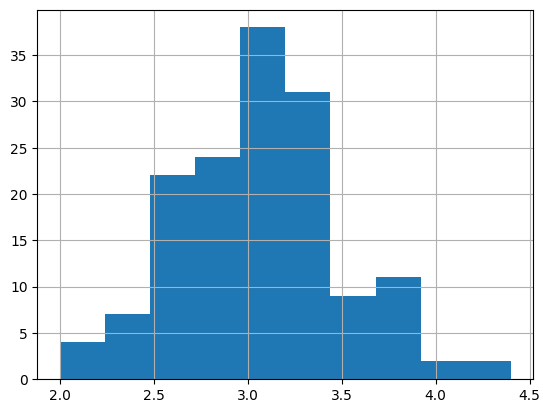

In [9]:
df['SepalWidthCm'].hist()

<Axes: >

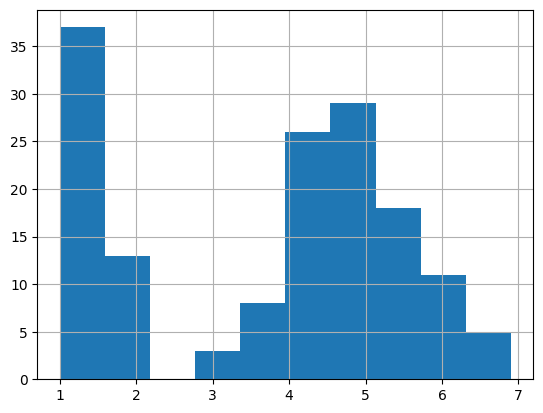

In [10]:
df['PetalLengthCm'].hist()

<Axes: >

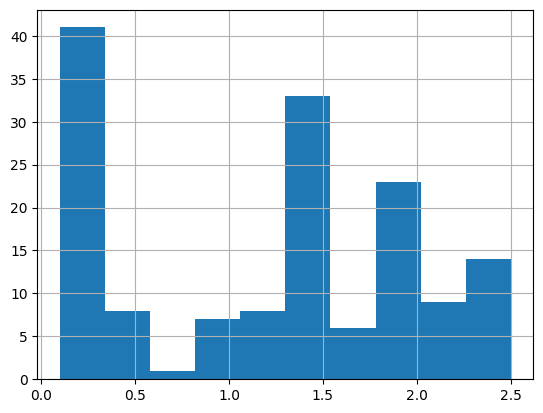

In [11]:
df['PetalWidthCm'].hist()

In [12]:
# Scatterplot
colors = ['red','blue','green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

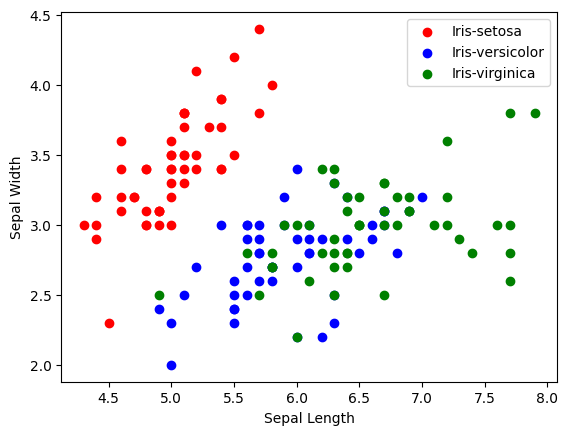

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


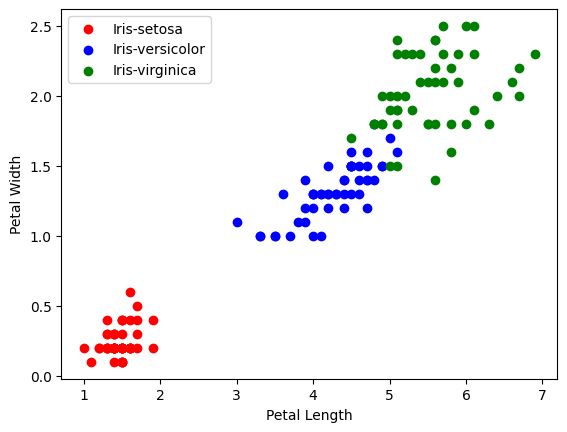

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


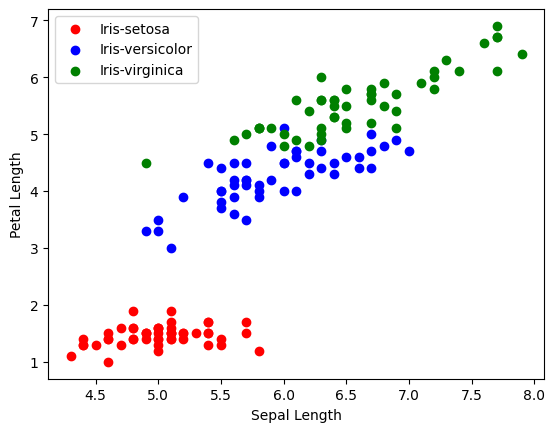

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()


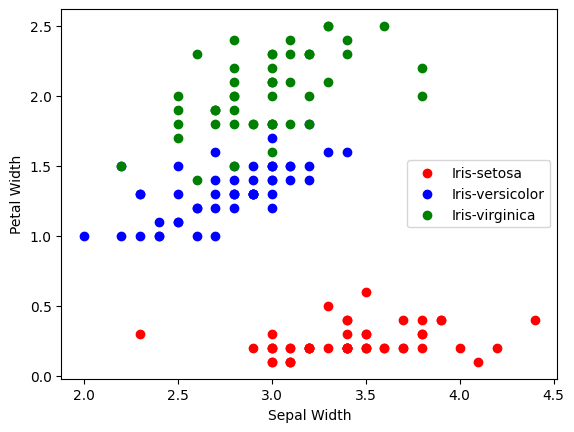

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


# **Correlation Matrix**

In [17]:
# Calculate correlation for numeric columns only
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


Text(0.5, 1.0, 'Correlation Matrix')

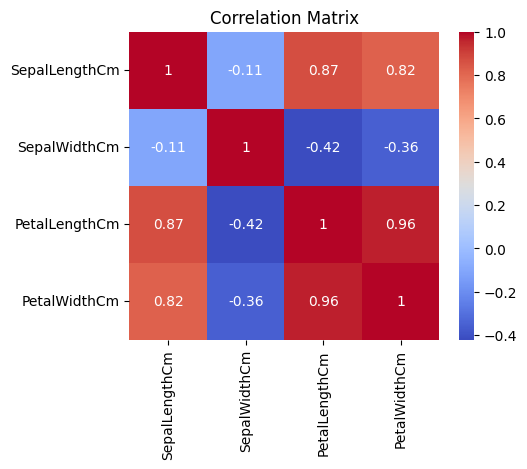

In [18]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')

# **Label Encoder**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Model Training**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
# model training
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# performance
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9555555555555556


In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [27]:
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# performance
print('Accuracy:', model1.score(X_test, y_test))

Accuracy: 0.9333333333333333


In [29]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [30]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Performance
print('Accuracy:', model2.score(X_test, y_test))

Accuracy: 0.9333333333333333
